In [1]:
import numpy as np
import pandas as pd
import pymc3 as pm
import theano.tensor as tt
import matplotlib.pyplot as plt

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# rat data (BDA3, p. 102)
n_tumour = np.array([
     0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,
     1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  1,  5,  2,
     5,  3,  2,  7,  7,  3,  3,  2,  9, 10,  4,  4,  4,  4,  4,  4,  4,
    10,  4,  4,  4,  5, 11, 12,  5,  5,  6,  5,  6,  6,  6,  6, 16, 15,
    15,  9,  4
])
n_rat = np.array([
    20, 20, 20, 20, 20, 20, 20, 19, 19, 19, 19, 18, 18, 17, 20, 20, 20,
    20, 19, 19, 18, 18, 25, 24, 23, 20, 20, 20, 20, 20, 20, 10, 49, 19,
    46, 27, 17, 49, 47, 20, 20, 13, 48, 50, 20, 20, 20, 20, 20, 20, 20,
    48, 19, 19, 19, 22, 46, 49, 20, 20, 23, 19, 22, 20, 20, 20, 52, 46,
    47, 24, 14
])

In [3]:
with pm.Model() as model:
    # Uninformative prior for alpha and beta
    u = pm.Uniform('u', 0, 1)
    v = pm.Uniform('v', 0, 1)
    
    alpha = pm.Deterministic('a', u / tt.pow(v, 2))
    beta = pm.Deterministic('b', (1 - u) / tt.pow(v, 2))
    pm.Potential('p(a,b)', tt.log(tt.pow(alpha+beta, -5/2)))
    
    theta = pm.Beta('theta', alpha=alpha, beta=beta, shape=len(n_rat))

    p = pm.Binomial('y', p=theta, observed=n_tumour, n=n_rat)

In [4]:
model.test_point

{'theta_logodds__': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]), 'u_interval__': array(0.), 'v_interval__': array(0.)}

In [5]:
model.check_test_point()

theta_logodds__    -69.64
u_interval__        -1.39
v_interval__        -1.39
y                 -631.61
Name: Log-probability of test_point, dtype: float64

In [6]:
with model:
    trace = pm.sample(1000, init='adapt_diag', tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [theta, v, u]
Sampling 2 chains: 100%|██████████| 4000/4000 [00:15<00:00, 251.55draws/s]
The number of effective samples is smaller than 25% for some parameters.


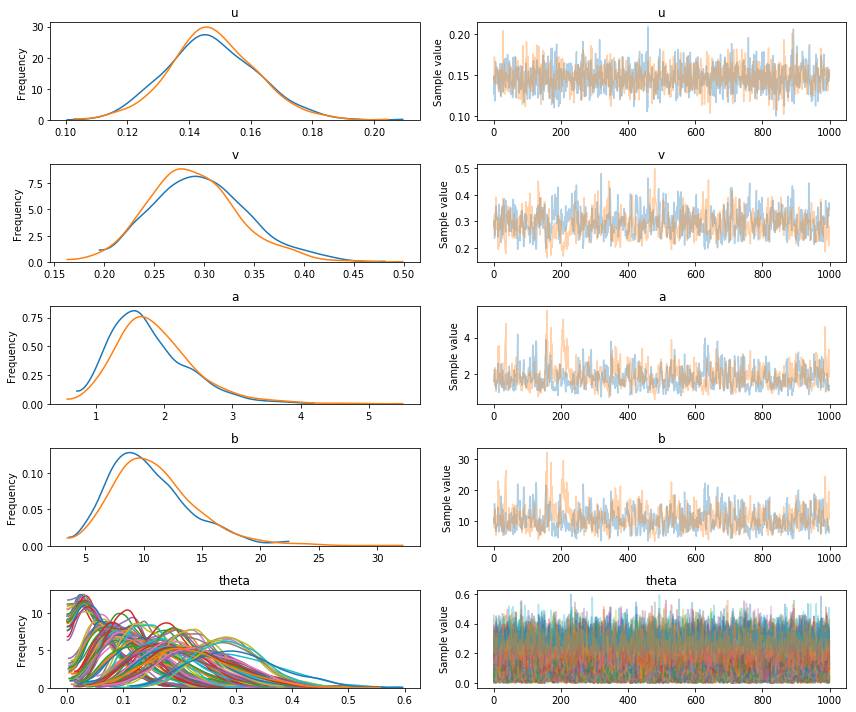

In [7]:
pm.traceplot(trace);

In [8]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
u,0.147392,0.014536,0.000361,0.119624,0.176897,1712.897454,0.999741
v,0.293349,0.047075,0.002020,0.211951,0.395365,381.600328,1.008464
a,1.834639,0.592643,0.027943,0.866712,2.999549,319.470795,1.009154
b,10.710009,3.564848,0.161785,4.287205,17.404432,349.819144,1.007263
theta__0,0.055774,0.041218,0.000923,0.000217,0.132774,1946.054462,1.001773
theta__1,0.054751,0.041160,0.000994,0.000040,0.132440,2410.198925,1.000145
theta__2,0.054890,0.038924,0.000911,0.000228,0.128045,1789.646199,0.999758
theta__3,0.055356,0.039413,0.000823,0.000113,0.131418,2024.757563,0.999663
theta__4,0.055887,0.043832,0.000949,0.000162,0.141139,2152.417104,0.999506
theta__5,0.055090,0.040047,0.000925,0.000106,0.134589,2166.680764,1.000040


In [36]:
def logp_ab(value):
    return tt.log(tt.pow(tt.sum(value), -5/2))


with pm.Model() as model:
    # Uninformative prior for alpha and beta
    ab = pm.HalfFlat('ab', 
                       shape=2, 
                       testval=np.asarray([1., 1.]))
    pm.Potential('p(a, b)', logp_ab(ab))
    
    theta = pm.Beta('theta', alpha=ab[0], beta=ab[1], shape=len(n_rat))

    p = pm.Binomial('y', p=theta, observed=n_tumour, n=n_rat)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [theta, ab]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:30<00:00, 199.99draws/s]
The number of effective samples is smaller than 25% for some parameters.


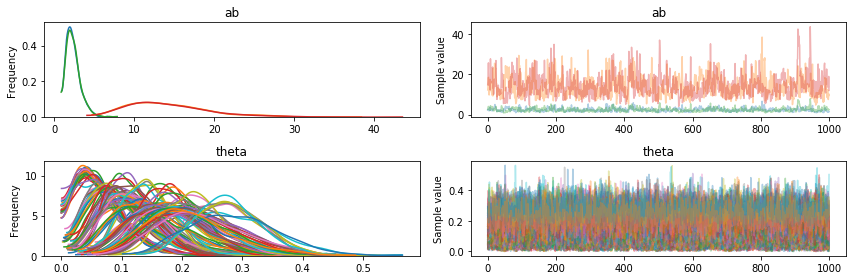

In [43]:
with model:
    trace = pm.sample(1000, tune=2000, nuts_kwargs={'target_accept': .95})

pm.traceplot(trace);

In [44]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
ab__0,2.394773,0.887578,0.042312,1.035678,4.203090,355.309665,0.999996
ab__1,14.267812,5.309532,0.246482,6.017429,25.548358,376.169780,0.999935
theta__0,0.062421,0.040618,0.000958,0.001400,0.139699,2041.333145,0.999501
theta__1,0.063927,0.041328,0.000923,0.001800,0.141089,1840.263484,0.999736
theta__2,0.062981,0.041062,0.000984,0.000142,0.141034,1557.536652,0.999668
theta__3,0.062422,0.041734,0.000964,0.002569,0.144248,2114.335126,0.999523
theta__4,0.062897,0.042244,0.000871,0.000601,0.143612,2016.559484,0.999825
theta__5,0.062472,0.041401,0.000888,0.001984,0.145052,2149.218342,0.999628
theta__6,0.063610,0.042714,0.000940,0.000797,0.148048,2023.469473,1.000209
theta__7,0.063976,0.041494,0.000815,0.000917,0.142114,2302.336997,0.999626


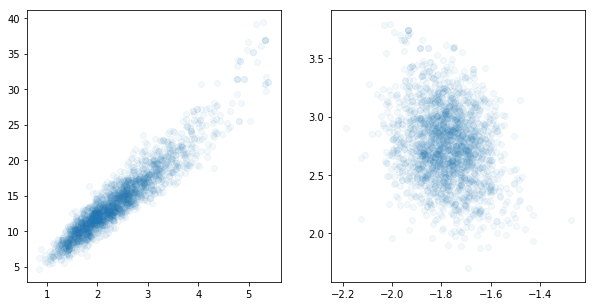

In [39]:
apost = trace['ab'][:, 0]
bpost = trace['ab'][:, 1]

_, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(apost, bpost, alpha=.05);
ax[1].scatter(np.log(apost/bpost), np.log(apost+bpost), alpha=.05);

In [11]:
import pymc3.distributions.transforms as tr

def logp_ab(value):
    return tt.log(tt.pow(tt.sum(value), -5/2))

with pm.Model() as model:
    # Uninformative prior for alpha and beta
    ab = pm.DensityDist('ab', logp_ab, transform=tr.log, 
                        shape=2, 
                        testval=np.asarray([1., 1.]))
    
    theta = pm.Beta('theta', alpha=ab[0], beta=ab[1], shape=len(n_rat))

    p = pm.Binomial('y', p=theta, observed=n_tumour, n=n_rat)

In [12]:
model.check_test_point()

ab_log__            -3.47
theta_logodds__    -98.43
y                 -631.61
Name: Log-probability of test_point, dtype: float64

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [theta, ab]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:21<00:00, 392.04draws/s]
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.


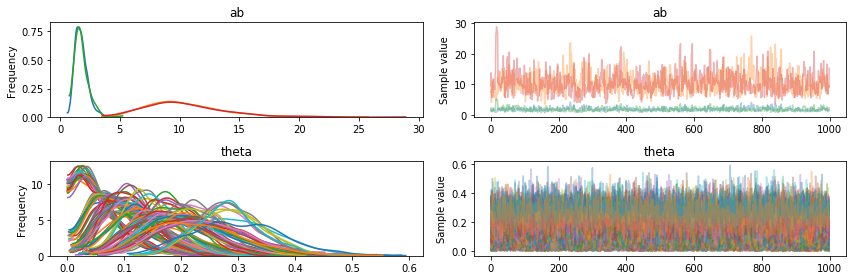

In [13]:
with model:
    trace = pm.sample(1000, tune=2000)

pm.traceplot(trace);

In [14]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
ab__0,1.779847,0.565561,0.023069,0.883513,2.946391,501.363252,1.000944
ab__1,10.453779,3.421503,0.134740,4.790767,17.125808,529.150981,1.000228
theta__0,0.054945,0.041228,0.000882,0.000073,0.137202,2491.070843,1.000222
theta__1,0.052666,0.037770,0.000653,0.000274,0.126156,3149.674369,0.999500
theta__2,0.053986,0.040611,0.000736,0.000032,0.133675,2636.643069,0.999646
theta__3,0.053758,0.041063,0.000786,0.000778,0.137151,2320.956231,1.000453
theta__4,0.053936,0.039292,0.000846,0.000024,0.128072,2355.157829,0.999855
theta__5,0.053424,0.040752,0.000848,0.000133,0.132276,2198.391553,1.000214
theta__6,0.053936,0.040880,0.000766,0.000080,0.134554,2973.779939,0.999501
theta__7,0.055698,0.041920,0.000796,0.000183,0.137425,2870.512929,0.999503


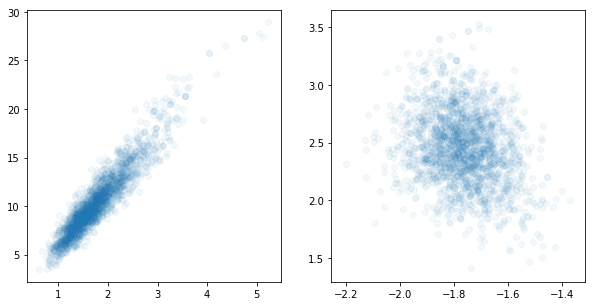

In [15]:
apost = trace['ab'][:, 0]
bpost = trace['ab'][:, 1]

_, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(apost, bpost, alpha=.05);
ax[1].scatter(np.log(apost/bpost), np.log(apost+bpost), alpha=.05);

In [23]:
with pm.Model() as model:
    # Uninformative prior for alpha and beta
    ab = pm.DensityDist('ab', logp_ab, 
                        shape=2, 
                        testval=np.asarray([1., 1.]))
    
    theta = pm.Beta('theta', alpha=ab[0], beta=ab[1], shape=len(n_rat))

    p = pm.Binomial('y', p=theta, observed=n_tumour, n=n_rat)
    trace = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [theta, ab]
Sampling 2 chains: 100%|██████████| 4000/4000 [00:12<00:00, 314.03draws/s]
There were 30 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6665299213478764, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9037244925392197, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


In [ ]:
pm.summary(trace)